In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv("Threats (1).csv")
data.head()

,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40000,40001,0.012996,tcp,-,FIN,16,18,1540,1644,...,1,6,0,0,0,5,7,0,Normal,0
1,40001,40002,0.004119,tcp,-,FIN,12,12,1064,2260,...,1,1,0,0,0,3,8,0,Normal,0
2,40002,40003,0.000988,udp,dns,CON,2,2,146,178,...,1,2,0,0,0,7,2,0,Normal,0
3,40003,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,...,1,1,0,0,0,4,1,0,Normal,0
4,40004,40005,0.193943,tcp,-,FIN,72,74,4238,63618,...,1,5,0,0,0,6,12,0,Normal,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135341 entries, 0 to 135340
Data columns (total 46 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         135341 non-null  int64  
 1   id                 135341 non-null  int64  
 2   dur                135341 non-null  float64
 3   proto              135341 non-null  object 
 4   service            135341 non-null  object 
 5   state              135341 non-null  object 
 6   spkts              135341 non-null  int64  
 7   dpkts              135341 non-null  int64  
 8   sbytes             135341 non-null  int64  
 9   dbytes             135341 non-null  int64  
 10  rate               135341 non-null  float64
 11  sttl               135341 non-null  int64  
 12  dttl               135341 non-null  int64  
 13  sload              135341 non-null  float64
 14  dload              135341 non-null  float64
 15  sloss              135341 non-null  int64  
 16  dl

In [4]:
X= data.drop(["label", "attack_cat", "Unnamed: 0", "id"], axis='columns')
y= data["attack_cat"]
X

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.012996,tcp,-,FIN,16,18,1540,1644,2539.242797,31,...,6,2,1,6,0,0,0,5,7,0
1,0.004119,tcp,-,FIN,12,12,1064,2260,5583.879675,31,...,2,1,1,1,0,0,0,3,8,0
2,0.000988,udp,dns,CON,2,2,146,178,3036.437382,31,...,3,2,1,2,0,0,0,7,2,0
3,3.415787,tcp,ssh,FIN,230,238,24344,29556,136.718127,31,...,4,1,1,1,0,0,0,4,1,0
4,0.193943,tcp,-,FIN,72,74,4238,63618,747.642372,31,...,6,1,1,5,0,0,0,6,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,24,24,13,24,0,0,0,24,24,0
135337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,1,1,2,0,0,0,1,1,0
135338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,3,3,13,0,0,0,3,12,0
135339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,30,30,14,30,0,0,0,30,30,0


In [5]:
y_encoded = y.astype("category").cat.codes
X = pd.get_dummies(X, drop_first=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [7]:
clf = DecisionTreeClassifier(max_depth=10, criterion="gini", random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [8]:
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.14      0.21       583
           1       0.53      0.10      0.17       530
           2       0.54      0.06      0.10      3709
           3       0.61      0.93      0.74     10055
           4       0.60      0.87      0.71      5435
           5       1.00      0.98      0.99     11931
           6       0.89      0.40      0.55      4859
           7       0.90      0.73      0.80      3097
           8       0.63      0.65      0.64       357
           9       0.67      0.17      0.27        47

    accuracy                           0.75     40603
   macro avg       0.68      0.50      0.52     40603
weighted avg       0.77      0.75      0.72     40603

Confusion Matrix:
 [[   80     9    10   411     1     0    72     0     0     0]
 [   15    53     4   440    10     0     1     4     3     0]
 [    1    11   209  3336    78     7    18    13    36     0]
 [   16  

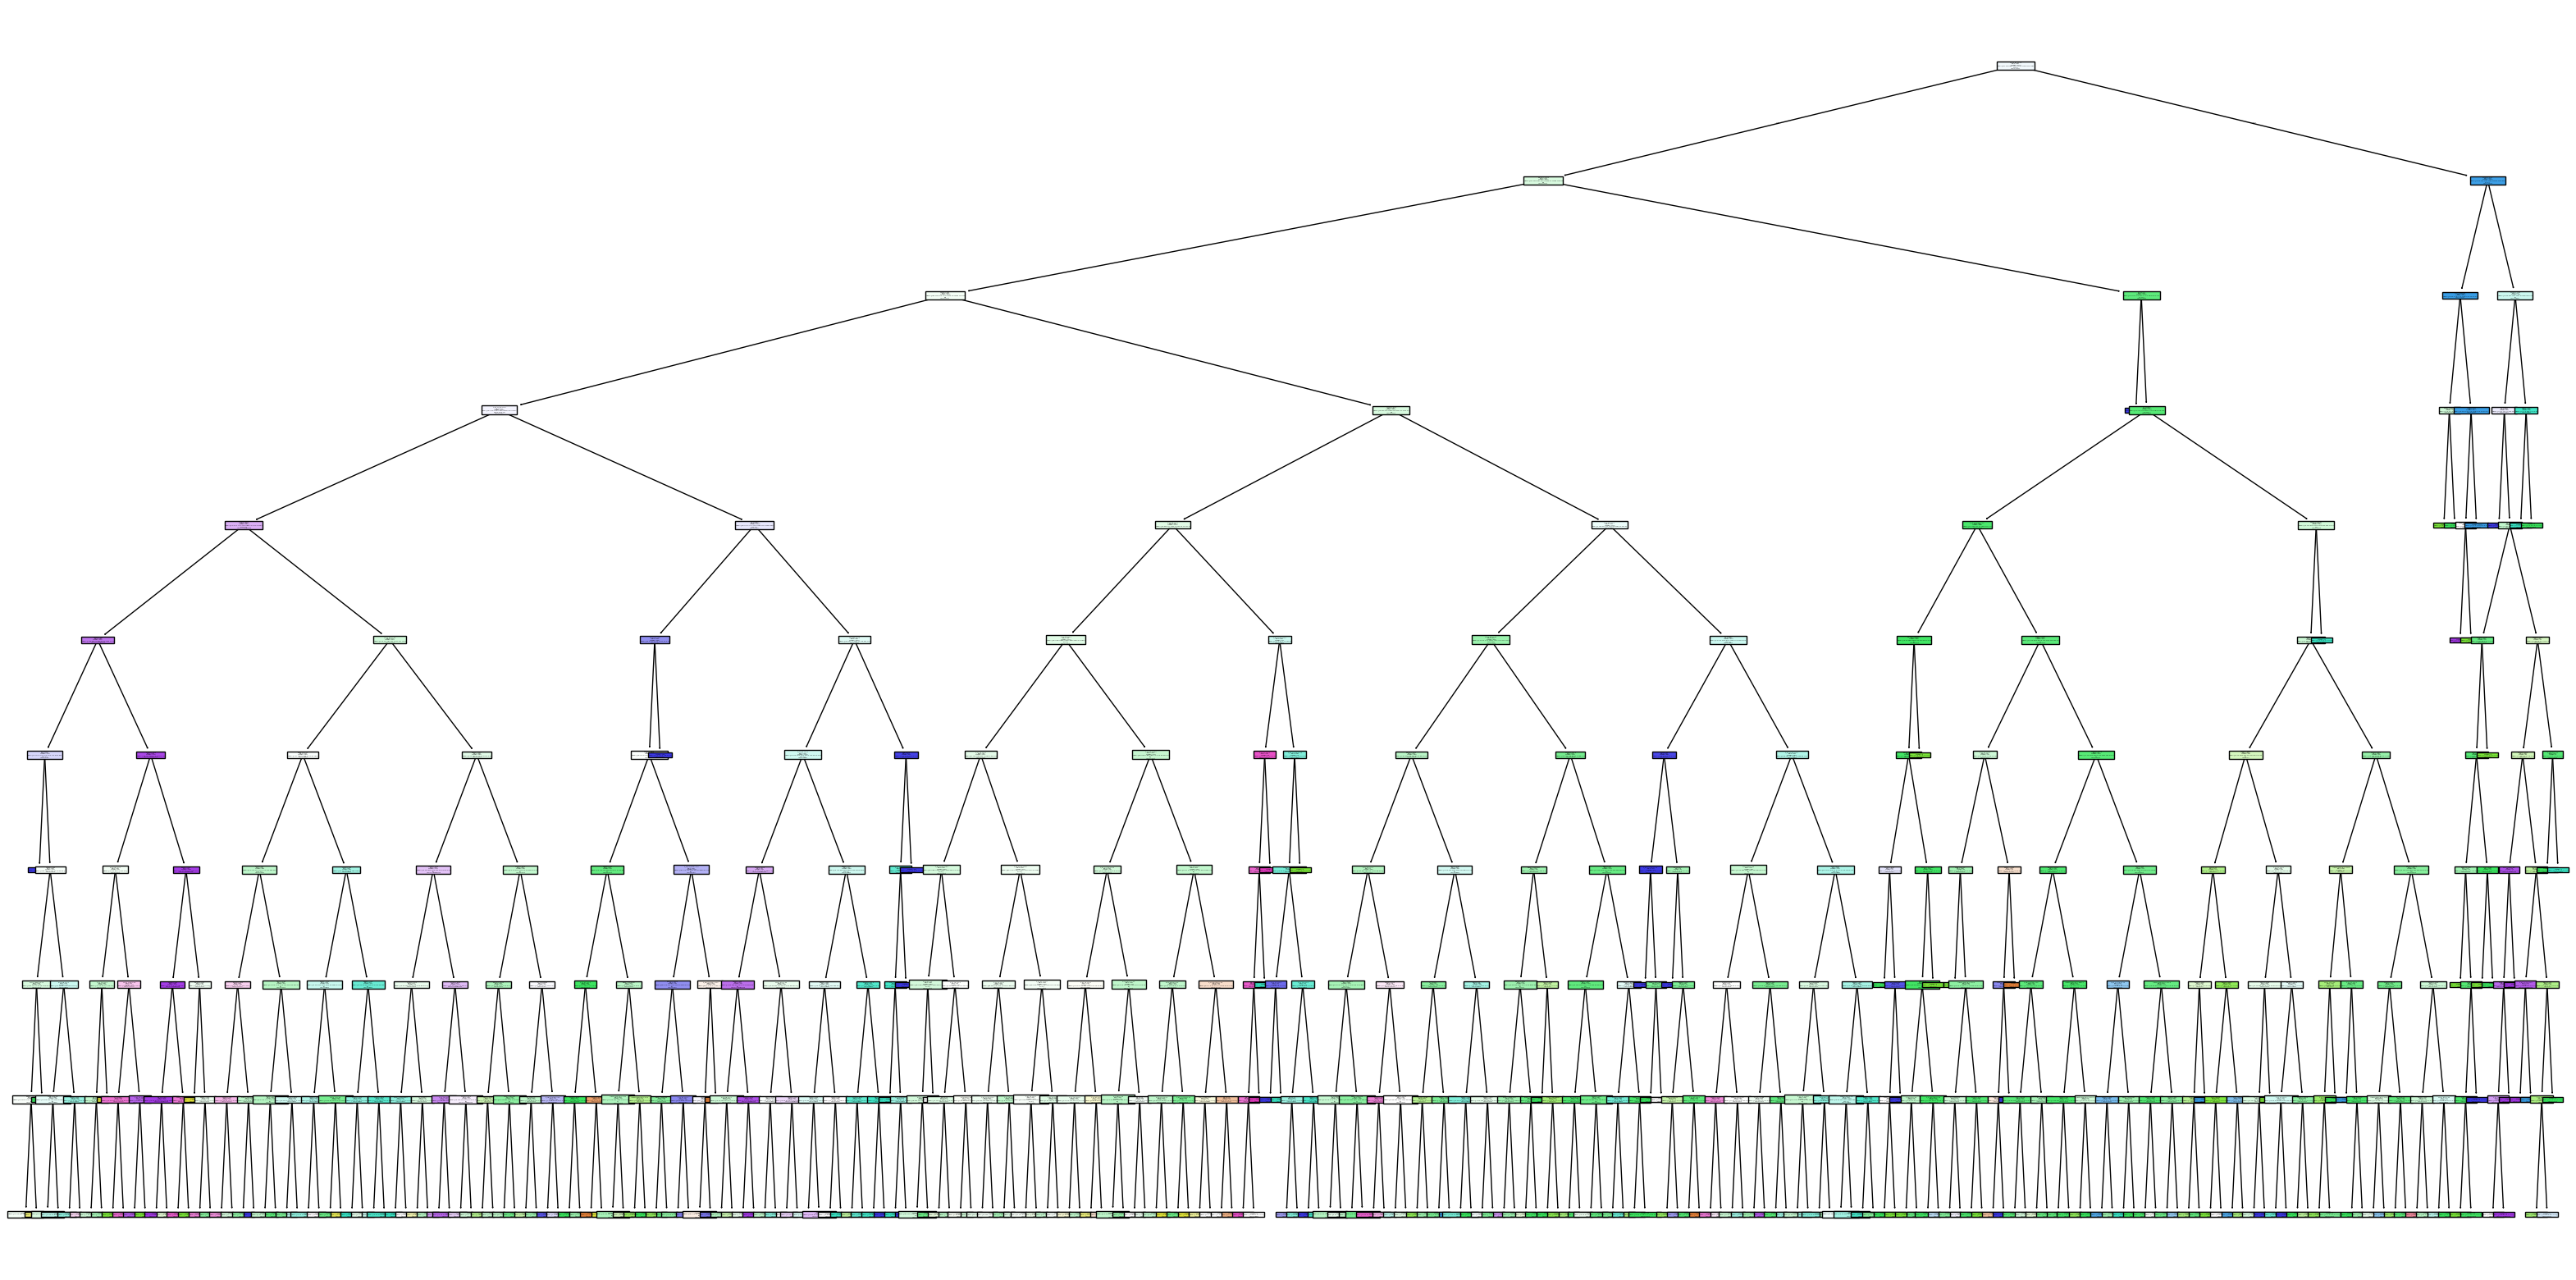

In [9]:
y_encoded = y.astype("category").cat.codes 
class_names = y.astype("category").cat.categories.tolist()
plt.figure(figsize=(40, 20))
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [10]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.14      0.21       583
           1       0.53      0.10      0.17       530
           2       0.54      0.06      0.10      3709
           3       0.61      0.93      0.74     10055
           4       0.60      0.87      0.71      5435
           5       1.00      0.98      0.99     11931
           6       0.89      0.40      0.55      4859
           7       0.90      0.73      0.80      3097
           8       0.63      0.65      0.64       357
           9       0.67      0.17      0.27        47

    accuracy                           0.75     40603
   macro avg       0.68      0.50      0.52     40603
weighted avg       0.77      0.75      0.72     40603

[[   80     9    10   411     1     0    72     0     0     0]
 [   15    53     4   440    10     0     1     4     3     0]
 [    1    11   209  3336    78     7    18    13    36     0]
 [   16    23   130  9307   213    19   123   179   